# Multiclass text classification using characters

## Prerequisites
Make sure you have all you need on your machine:
- Install or Update latest version Anaconda (conda package manager + many libraries) or Miniconda (just conda package manager)
- Create a conda virtual environment with a specific version of python (conda create -n myvirtual_env python=3.10 )
- Activate the environment (conda activate myvirtual_env)
- Install Jupyter in your environment (conda install jupyter)
- Install the required libraries (conda install pytorch=1.13.1 sklearn)
- Install a python kernel in your environment (conda install ipykernel)
- Configure Jupyter to use Python kernel (ipython kernel install --user --name=myvirtual_env-kernel)   
- Open Jupyter notebook on a web page and start coding (jupyter notebook )


## Loading the data

In [1]:
from io import open
import glob                       ## used to find all files that have a specific pattern
import os
## Check the files that we have in the dataset
datasetFiles = glob.glob('C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names/*.txt') ## adjust the path accordingly
print(datasetFiles) 

['C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Arabic.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Chinese.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Czech.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Dutch.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\English.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\French.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\German.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Greek.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Irish.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Italian.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Japanese.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names\\Korean.txt', 'C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/name

## Defining our vocabularies

In [2]:
import unicodedata
import string
all_letters = string.ascii_letters + " .,;'"      ## All letters and special characters we will recognize
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [3]:
n_letters = len(all_letters)                      ## the size of our feature vector to one-hot encoder
n_letters

57

In [4]:
language_names = {}             ## defines a dictionary all the names in a specific languages
all_languages = []              ## defines a list of all the languages we ave in our dataset

In [5]:
## Helper function to convert all characters that are not included in our vocabulary to their closest ascii equivalent
def unicodeToAscii(s):
    return ''.join(
                   c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn'
                   and c in all_letters
    )

## Check the function with a random character 
print(unicodeToAscii('Émile'))

Emile


In [6]:
## Helper function to easily find all text files in a specified folder
def findFiles(path):
    return glob.glob(path)

In [7]:
## Let's populate the dictionnary that we have defined previously
total_names = 0                                                                                     ## define a variable to track the number of names in a specific dataset

for filename in findFiles ('C:/Users/esspe/ML-Notebooks/BasicTextClassification/data/names/*.txt'): ## create a loop to read all the files in a specific folder amd find the basename
    language = os.path.splitext(os.path.basename(filename))[0]                                      ## the name of the file excludig the .txt extenson contains the language itself
    all_languages.append(language)                                                                  ## append all the languages in a list 
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')                        ## read the content of each file, strip any unnecessary characters and split the content on the return character \n
    names = [unicodeToAscii(line) for line in read_names]                                           ## convert all the names that in the files in ascii format and save in a list
    language_names[language] = names                                                                ## associate all names to their language 
    total_names += len(names)                                                                       ## update the total_names variable by adding every name found in the files
    

In [8]:
## Check all the languages in our dataset
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [9]:
## Check the total number of languages in our dataset
n_languages = len(all_languages)
n_languages

18

In [10]:
## Check the total number of names in our dataset
total_names

20074

In [11]:
## Check a few names in our dataset
print("Here are some Czech names:")
print(language_names['Czech'][:5])
print("Here are some Korean names:")
print(language_names['Korean'][:5])

Here are some Czech names:
['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']
Here are some Korean names:
['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']


## Prepocessing the data

In [12]:
import torch

In [13]:
## Helper function that converts every letter or character in a name to its one-hot encoder equivalent
def letterToTensor(letter):
    tensor = torch.zeros(1,n_letters)          ## for every letter, we initialize a feature vector of all 0 and the lenght is the total number of characters in our vocabulary
    tensor[0][all_letters.find(letter)] = 1    ## to hot-encode the letter, we set to 1 the index of the letter in the vocabulary
    return tensor                              ## return the one-hot encoder form of the letter provided as input

In [14]:
## Check the function with some examples
print(letterToTensor('a'))
print(letterToTensor('Z'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]])


In [15]:
## Helper function to have each indivual name in our dataset i tensor format
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)       ## for every letter in the input name, we initialize a feature vector of all 0 and the lenght is the total number of characters in our vocabulary
    
    for li, letter in enumerate(name):                  ## enumerate through all the characters in the input name and find the corresponding index 
        tensor[li][0][all_letters.find(letter)] = 1     ## to hot-encode the letter, we set to 1 the index of the letter in the vocabulary
        
    return tensor

In [16]:
## Check the function with some examples
mary_tensor =  nameToTensor('Mary')
mary_tensor.size() 

## Expected result: torch.Size([4, 1, 57])
## there are 4 characters in the name Mary
## the additional dimension of 1 is the format that the RNN expects
## 57 is the size of the one-hot encoded feature vector


torch.Size([4, 1, 57])

In [17]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

## Designing the Recurrent Neural Network  
### that will classify the names in specific categories, in this case the categories are the languages

In [18]:
import torch.nn as nn
class RNN(nn.Module):

   ## In this process, we are managing the hidden state ourselves, we track it, add it to the input state and return it to the user 
    def __init__(self, data_size, hidden_size, output_size):         ## create the RNN class that derives from nn module base class
        super(RNN, self).__init__()                                  ## the inputs parameters of the class: data_size is the size of our one-hot encoder feature vector; hidden_size is a RNN dimensionality, output_size is the number of categories that we have 

        self.hidden_size = hidden_size
        input_size = data_size + hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)                ## i2h = input to hidden, gets the next hidden state from the current input and previous hidden state
        self.i2o = nn.Linear(input_size, output_size)               ## i2o = input to output, gets the next output state from the current input and previous hidden state
        self.softmax = nn.LogSoftmax(dim=1)                          ## LogSoftmax is a classic layer for classification operations
 

    def forward(self, input, hidden):                            ## function that performs the forward path to our RNN using the current input character and the previous hidden state
        combined = torch.cat((input, hidden), 1)                    ## concatenate the current input with the previous hidden state to get a single tensor
        hidden = self.i2h(combined)                                     ## we pass the tensor (input) to the i2h layer to get the next hidden state of our RNN
        output = self.i2o(combined)                                    ## we pass the same tensor (input) to the i2o layer to get the next output state of out RNN 
        output = self.softmax(output)                                ## we apply the logSoftmax function to the output state
        return output, hidden                                        ## we return the output state and the current hidden state. This the new hidden state after the current character was processed #    def forward(self, input, hidden):                                   ## functions that performs the forward path to our RNN using the current input character and the previous hidden state
  
    
    def initHidden(self):
        return torch.zeros(1,self.hidden_size)                        ## we initialize the first hidden state to zero

## Our RNN has memory since we are tracking the hidden state 


In [19]:
## Let's instantiate the RNN and work with it
n_hidden = 256
rnn = RNN(n_letters, n_hidden, n_languages)    ## input_size is our characters vocabulary n_letters, hidden_size is 256, output_size is the total number of languages

In [20]:
## Here is an example to show the steps of the training process
inp = letterToTensor('C')                           ## convert a single character such as "C" to it one-hot encoded form in this case using letterToTensor
hidden = torch.zeros(1, n_hidden)                   ## set the initial hidden state at zero since we have no previous hidden state for the first characters
output, next_hidden = rnn(inp, hidden)              ## apply the rnn to a single character to get the output and the next hidden size

print ('output size =', output.size())
print ('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size = torch.Size([1, 256])


In [21]:
## Another example where we pass the first character of a random name
inp = nameToTensor('Charron')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(inp[0], hidden)

In [22]:
print(output)

tensor([[-2.9180, -2.8230, -2.8694, -2.8964, -2.8588, -2.9099, -2.8834, -2.9096,
         -2.9124, -2.8783, -2.9379, -2.8849, -2.8857, -2.8807, -2.9762, -2.8620,
         -2.8493, -2.9012]], grad_fn=<LogSoftmaxBackward0>)


## Setting up a few helper functions

In [23]:

def languageFromOutput(output):                        ##function to find the language of a given output
    _, top_i = output.topk(1)                          ## top_i will be the index of highest value of the output 
    language_i = top_i[0].item()                       ## find the index of the predicted language (language_i) using top_i
    return all_languages[language_i], language_i       ## find the language in the list of all languages using language_i 

In [24]:
## Check that the helper function works correctly
print(languageFromOutput(output))

('Chinese', 1)


In [25]:
## In order to train our RNN, we will randomly pick a number of names and their coresponding languages, feed it to the RNN and adjust the model weights
import random

def randomTrainingExample():                                                           
    random_language_index = random.randint(0, n_languages-1)                            ## select a language at random and assign it to the variable language
    language = all_languages[random_language_index]
    
    random_language_names = language_names[language]                                    ## select a name at random and assign it to the variable name
    name = random_language_names[random.randint(0,len(random_language_names)-1)]
    
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)   ## once we have a language and a name selected, we convert them to a tensor format
    name_tensor = nameToTensor(name)
    
    return language, name, language_tensor, name_tensor

In [26]:
## Check that the helper function works correctly
for i in range (10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print('language=', language, ', name=', name)
    

language= Chinese , name= Tao
language= Arabic , name= Seif
language= Scottish , name= Fraser
language= Portuguese , name= Ferreiro
language= English , name= Aderson
language= Portuguese , name= Mateus
language= Spanish , name= Bustos
language= Scottish , name= Fraser
language= Spanish , name= Dominguez
language= German , name= Leitz


## Training the RNN model

In [27]:
## The last layer of our RNN was the LogSoft Max layer, so we will use the NLLLoss to train our RNN
## Choose a learning reate and adjust as needed
criterion = nn.NLLLoss()
learning_rate = 0.005

In [28]:
## helper function to train the model
def train (language_tensor, name_tensor):              ## language and name are the inpus we need
    hidden = rnn.initHidden()                          ## initialize th ehidden state to be all zeros
    rnn.zero_grad()                                    ## we set the gradient at zero
    
    for i in range (name_tensor.size()[0]):            ## run the function for all the characters of the input name
        output, hidden = rnn(name_tensor[i], hidden)   ## for every character in our input name, we parse it into the RNN with its current weight and we also parse in the previous weight
                                                       ## this will give us the current output and the current hidden state of the RNN
    loss = criterion(output, language_tensor)          ## once the loop is complete, we have the final output of the RNN for a particular name, we compare it with the language tensor that contains our actual language labels
    loss.backward()                                    ## once the loss has been calculated, we mak ea backward pass to our RNN to calculate gradients
    
    for p in rnn.parameters():                         ## we use the gradients to update our model parameters
        p.data.add_(-learning_rate, p.grad.data)       ## we multiply th egradients using the learning rate
        
    return output, loss.item()

In [34]:
## Setting up the variables to be ready to train 

n_iters = 100000     ## we want to train our model on 20 000 names, so some of the language-name pairs will be pass through more than once 
current_loss = 0     ## initialize 2 variables to keep track of the current loss and all of the losses during the training process
all_losses= []


In [35]:
## Let's run a major for loop to train our model
for result in range (1, n_iters + 1):                                               ## the loop will parse through 100 000 iterations as defined earlier
    language, name, language_tensor, name_tensor = randomTrainingExample()          ## for each iteration we will pick a sample at random
    
    output, loss = train (language_tensor, name_tensor)                             ## invoke the train function which will parse the random sample throug our neural network and train it
    current_loss += loss                                                            ## keep track of the current loss
    
    if result % 5000 == 0:                                                         ## after every 5 000 samples parsed through the RNN, let's see how our RNN is working
        guess, guess_i = languageFromOutput(output)                                 ## we get the predicted label from the RNN for this partcicular example
        correct_guess = 'OK' if guess == language else 'NOT OK (%s)' % language
                                                                                    ## we print out the actual label VS the predicted label
        print ('%d %d%% %.4f %s / %s %s' % (result,                                   
                                         result / n_iters * 100,
                                         loss,
                                         name,
                                         guess,
                                         correct_guess))
        
        if result % 1000 == 0:
            all_losses.append(current_loss / 1000)                                  ## we will keep track of the loss of the neural network every 1000 iteration
            current_loss = 0

5000 5% 5.2817 Lis / Chinese NOT OK (Polish)
10000 10% 1.0652 Panek / Czech OK
15000 15% 2.7534 Manfredonia / Greek NOT OK (Italian)
20000 20% 3.8643 Till / Vietnamese NOT OK (Czech)
25000 25% 2.1228 Finch / Czech NOT OK (English)
30000 30% 0.4369 Ruadhain / Irish OK
35000 35% 2.0416 Kieu / Chinese NOT OK (Vietnamese)
40000 40% 1.4876 Tahan / Irish NOT OK (Arabic)
45000 45% 0.5705 Capello / Italian OK
50000 50% 1.7262 Tuma / Japanese NOT OK (Arabic)
55000 55% 0.1559 Luong / Vietnamese OK
60000 60% 0.2619 Jiu / Chinese OK
65000 65% 0.6907 Kunik / Czech OK
70000 70% 0.1365 Badikoff / Russian OK
75000 75% 0.4953 Trinh / Vietnamese OK
80000 80% 0.6398 Dasios / Greek OK
85000 85% 0.5555 Schoorl / Dutch OK
90000 90% 0.4986 Banh / Vietnamese OK
95000 95% 0.3348 Ri / Korean OK
100000 100% 5.2843 Tourna / Italian NOT OK (Greek)


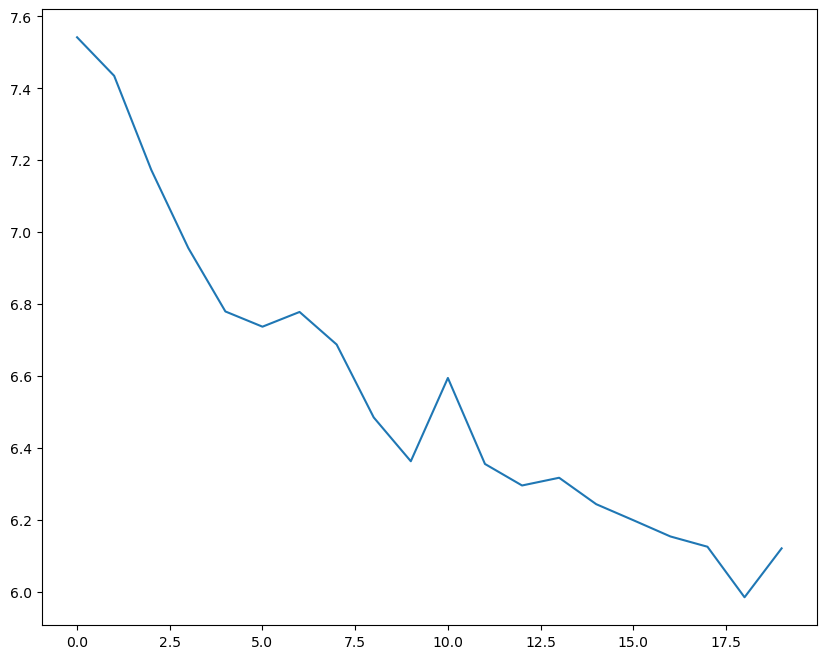

In [36]:
## Let's use the matplotlib library to visualize the loss value through the iterations

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

## we can see that the loss value falls sharply at first then fluctuates at the end

## Testing the model 

In [37]:
## We will use the RNN model to predict the language of names that were not in the training data set

n_predictions = 3   ## The model should give 3 predictions for each name given as input

In [44]:
input_name= 'Batsakis'    ## This is a greek name 

In [45]:
with torch.no_grad():                                             ## for model evaluation we don't calculate the gradient
    name_tensor = nameToTensor(input_name)                        ## cnvert the input name to a tensor format
    
    hidden = rnn.initHidden()                                     ## initialize the hidden state to all zeros
    for i in range (name_tensor.size()[0]):                       ## feed in the input name character by character to the RNN
        output, hidden = rnn(name_tensor[i], hidden)              ## we get the hidden state for each character and feed it back when we parse in the next character as input to the RNN
    topv, topi = output.topk(n_predictions, 1, True)              ## use the output.topk function to get the top 3 predictions from the model
    
    for i in range (n_predictions):                               ## iterate through all the language predictions
        value = topv[0][i].item()
        language_index = topi[0][i].item()                        ## get the language index and print the language on screen
        
        print('(%.2f) %s' % (value, all_languages[language_index]))

## Change the input name and run the script to see how the model behaves and evaluate the quality of the predictions

(-0.10) Greek
(-2.62) Russian
(-5.24) French
